<a href="https://colab.research.google.com/github/abd-alrifai/house-price-analysis/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [43]:
'''
load dataset
'''
df = pd.read_csv("project_2_data.csv")

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
print("Columns:", df.columns.tolist())


Columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',

In [46]:
df['GarageFinish']

,GarageFinish
0,RFn
1,RFn
2,RFn
3,Unf
4,RFn
...,...
1455,RFn
1456,Unf
1457,RFn
1458,Unf


In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
'''
ANOVA Test: GarageFinish vs SalePrice

'''

# Check null values
df[['GarageFinish', 'SalePrice']].isnull().sum()

,0
GarageFinish,81
SalePrice,0


In [49]:
#Data cleaning (removing null values)
df_clean = df.dropna(subset=['GarageFinish', 'SalePrice'])

In [50]:
# Check null values
df_clean[['GarageFinish', 'SalePrice']].isnull().sum()

,0
GarageFinish,0
SalePrice,0



**Hypotheses**:

*    H0 : There is no difference in average selling price between GarageFinish brands

*    H1 : There is a difference in average for at least one category





In [51]:
'''
- Create a list of arrays, where each array contains the SalePrice values for a specific GarageFinish category

- This groups houses by their garage finish type and extracts sale prices for each group

'''
groups = [group['SalePrice'].values for _, group in df_clean.groupby('GarageFinish')]

###############################################################################

'''
Perform one-way """ANOVA test""" to compare mean SalePrice across different GarageFinish categories
*groups unpacks the list of arrays as separate arguments to f_oneway
'''

f_stat, p_value = stats.f_oneway(*groups)


In [52]:
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("\nWe reject H0 - There is a significant difference between the categories")
else:
    print("\nWe don't reject H0 - There is no significant difference between the categories")

F-statistic: 250.96246721359347
p-value: 1.1991165312294262e-93

We reject H0 - There is a significant difference between the categories


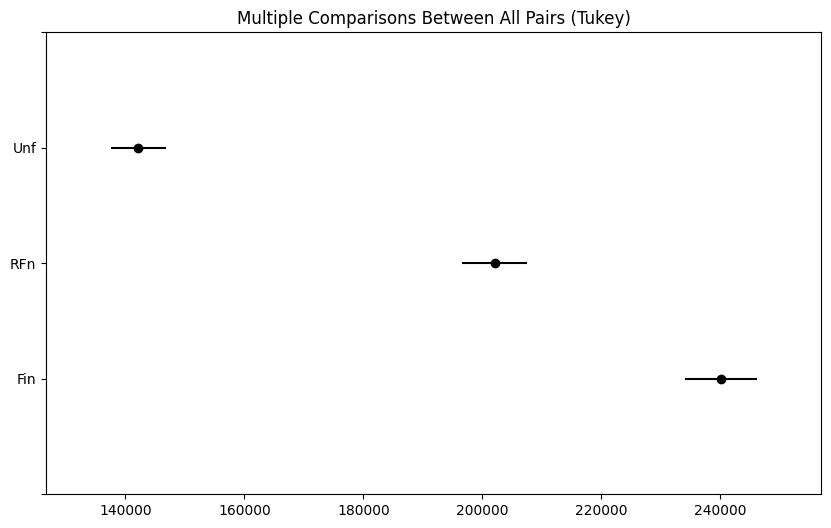

In [41]:

### Post-hoc Test (Tukey HSD)

tukey = pairwise_tukeyhsd(
    endog=df_clean['SalePrice'],
    groups=df_clean['GarageFinish'],
    alpha=0.05
)
tukey.plot_simultaneous()
plt.show()


I chose ANOVA because it is the appropriate statistical method for comparing average prices between more than one category of garage finishes, and it is a parametric test that assumes a normal distribution and homogeneity in variance, and is perfectly suited to the question at hand.

In [35]:
### Multiple Linear Regression Model

'''
I selected the features most relevant to """SalePrice"""
'''
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
target = 'SalePrice'

# Drop missing values
df = df.dropna(subset=features + [target])


X = df[features]
y = df[target]


#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

#Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = model.score(X_test, y_test)

print("Model Evaluation Metrics:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")
print(f"R²   = {r2:.4f}")

Model Evaluation Metrics:
MAE  = 25446.05
RMSE = 40036.42
MAPE = 15.80%
R²   = 0.7910


In [38]:
#Display regression coefficients

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nRegression Equation:")
print(f"SalePrice = {model.intercept_:.2f} + " + " + ".join([f"{coef:.2f}*{feat}" for coef, feat in zip(model.coef_, features)]))
print("\nCoefficients:\n", coef_df)


Regression Equation:
SalePrice = -94422.12 + 23766.30*OverallQual + 42.80*GrLivArea + 19560.82*GarageCars + 28.40*TotalBsmtSF

Coefficients:
        Feature   Coefficient
0  OverallQual  23766.297562
1    GrLivArea     42.796305
2   GarageCars  19560.815807
3  TotalBsmtSF     28.403728


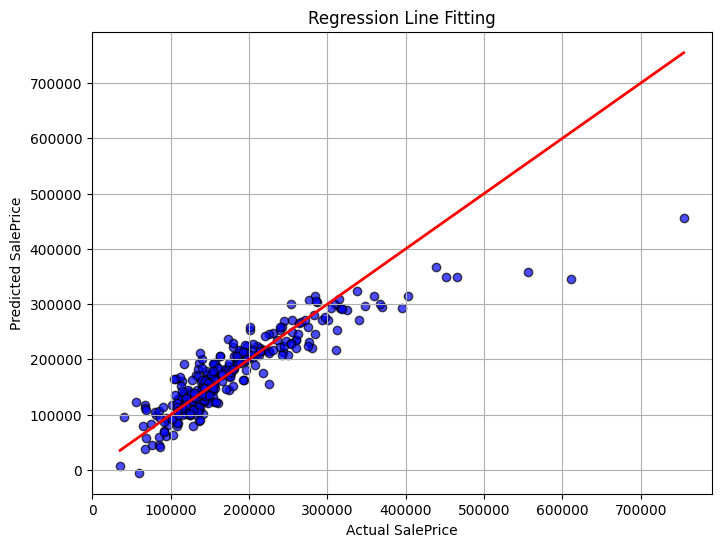

In [39]:
# Visualization: Actual vs Predicted

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Regression Line Fitting')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.grid(True)
plt.show()